# Création de 3 notebook --> .py,plk,st, une bdd

# SOMMAIRE

## EDA
### récuperation de la donnée
### nettoyage de la donnée
### visualisation de la donnée
### analyse univariée et bivariée
## PREPROCESSING
### normalisation de la donée, bonus comparait 3 scalers
### 

## ML
### split du model
### préparation du model de base
### comparaison de models adaptés
### tuning du model choisi

In [41]:
# Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix, classification_report

from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve

from sklearn.model_selection import learning_curve

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.inspection import permutation_importance
#import warnings
import warnings
#warnings.simplefilter(action="ignore")
warnings.filterwarnings("ignore")


import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.datasets import make_classification

from matplotlib.colors import LinearSegmentedColormap


from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE
from sklearn.model_selection import learning_curve


from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

import pickle

In [2]:
data = pd.read_csv("./data/data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.shape

(569, 33)

In [5]:
pd.DataFrame(data.isna().sum())

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [6]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
diagnosis = data['diagnosis'].value_counts()

([<matplotlib.patches.Wedge at 0x19eb622cdc0>,
 [Text(-0.4286546999573329, 1.0130425204326268, 'Benin'),
  Text(0.428654605109445, -1.013042560566172, 'Malignant')],
 [Text(-0.23381165452218156, 0.5525686475087055, '62.7%'),
  Text(0.23381160278696997, -0.55256866939973, '37.3%')])

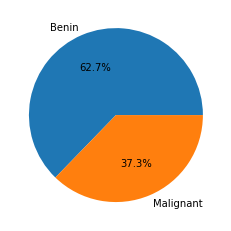

In [8]:
import matplotlib.pyplot as plt
labels = 'Benin','Malignant'
fig, ax = plt.subplots()
ax.pie(diagnosis, labels=labels, autopct='%1.1f%%')

radius_mean                   AxesSubplot(0.125,0.772143;0.110714x0.107857)
texture_mean               AxesSubplot(0.257857,0.772143;0.110714x0.107857)
perimeter_mean             AxesSubplot(0.390714,0.772143;0.110714x0.107857)
area_mean                  AxesSubplot(0.523571,0.772143;0.110714x0.107857)
smoothness_mean            AxesSubplot(0.656429,0.772143;0.110714x0.107857)
compactness_mean           AxesSubplot(0.789286,0.772143;0.110714x0.107857)
concavity_mean                AxesSubplot(0.125,0.642714;0.110714x0.107857)
concave points_mean        AxesSubplot(0.257857,0.642714;0.110714x0.107857)
symmetry_mean              AxesSubplot(0.390714,0.642714;0.110714x0.107857)
fractal_dimension_mean     AxesSubplot(0.523571,0.642714;0.110714x0.107857)
radius_se                  AxesSubplot(0.656429,0.642714;0.110714x0.107857)
texture_se                 AxesSubplot(0.789286,0.642714;0.110714x0.107857)
perimeter_se                  AxesSubplot(0.125,0.513286;0.110714x0.107857)
area_se     

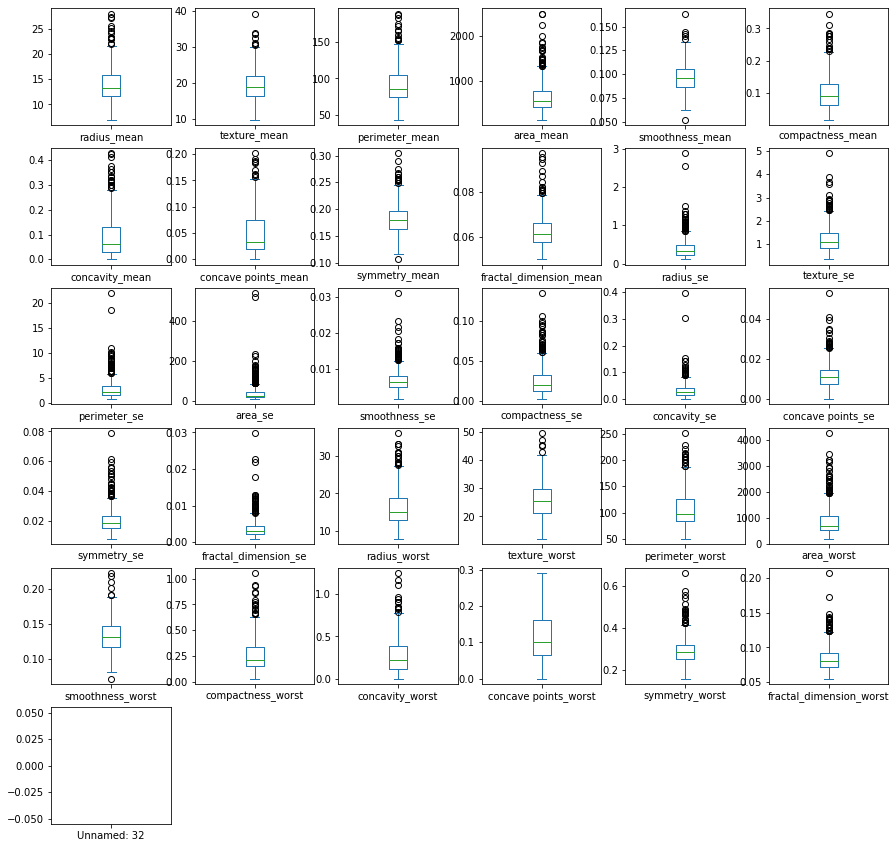

In [9]:
data.iloc[: ,1:].plot(kind = "box", subplots = True, layout = (6,6), figsize = (15,15))

In [10]:
# sns.pairplot(data.iloc[: ,1:],corner = True, hue = 'diagnosis')

In [11]:
# g = sns.PairGrid(data = data,corner = True)
# g.map_lower(sns.kdeplot, hue = None, levels = 4, color = ".2")
# g.map_lower(sns.scatterplot, marker = "+")
# g.map_diag(sns.histplot, element = 'step', linewidth=0,kde=True)
# g.add_legend(frameon=True)
# g.legend.set_bbox_to_anchor((.61,.6))

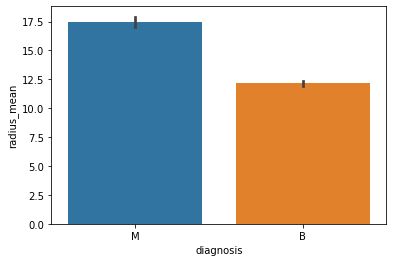

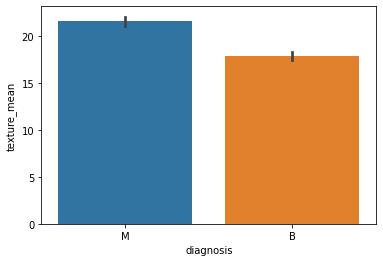

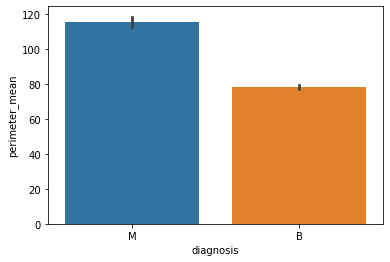

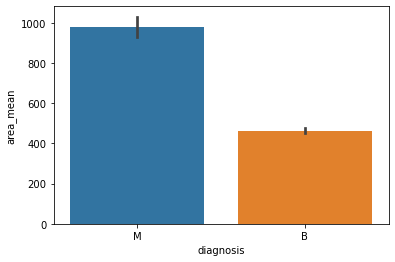

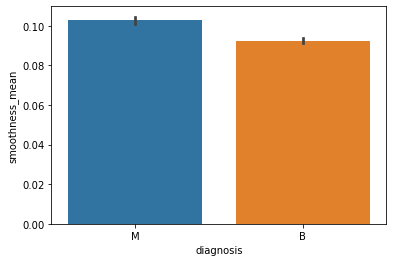

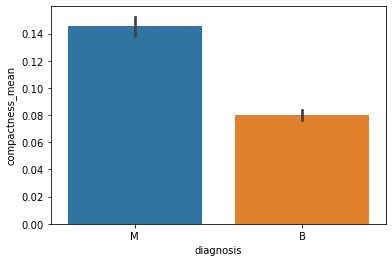

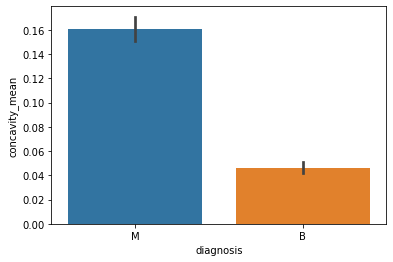

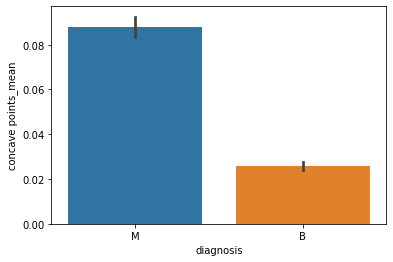

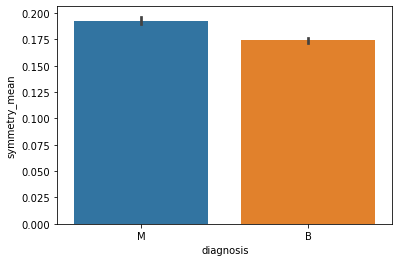

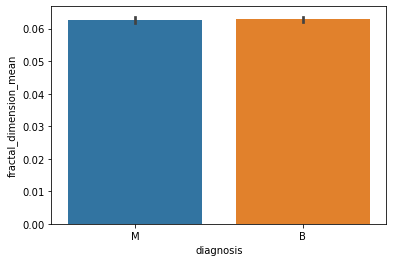

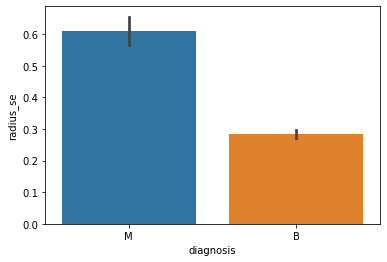

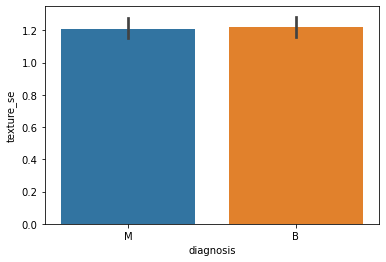

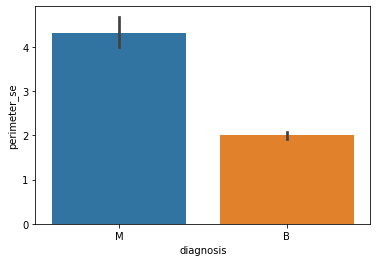

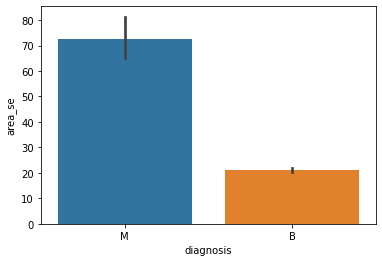

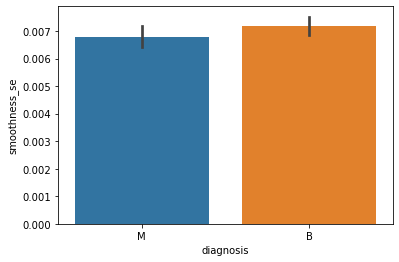

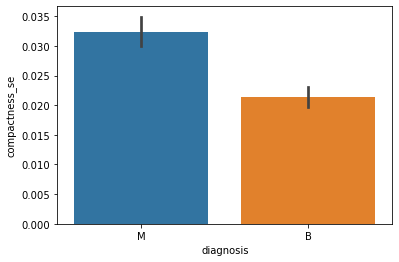

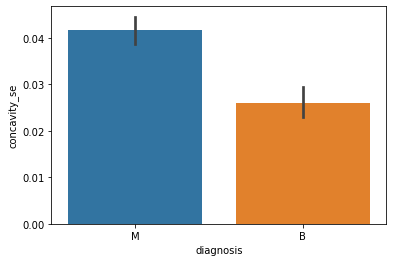

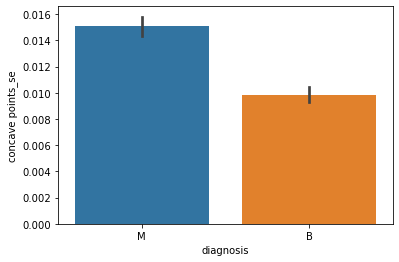

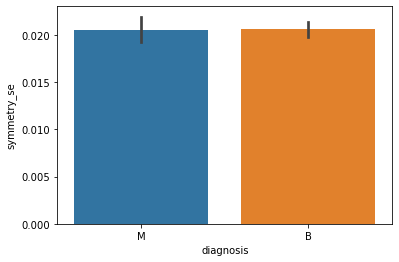

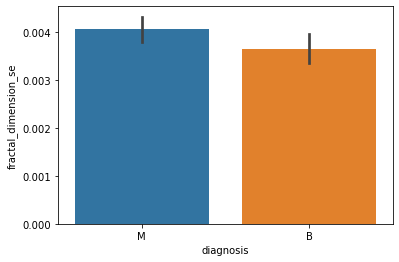

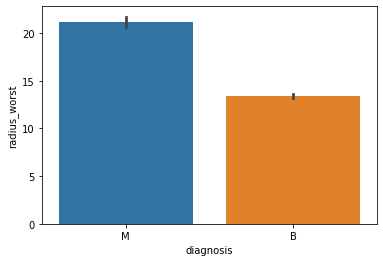

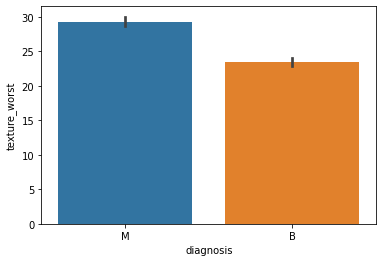

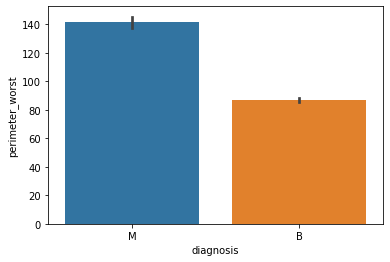

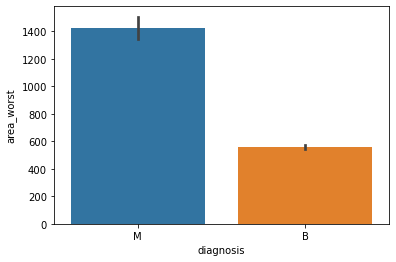

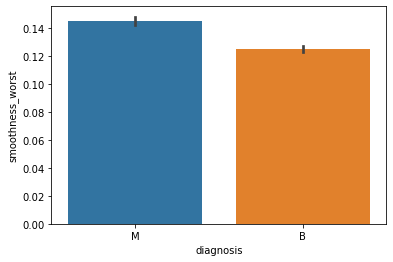

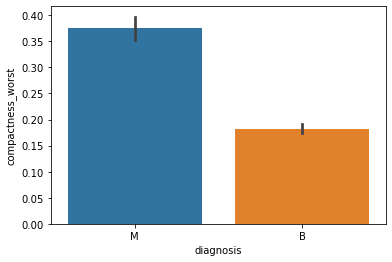

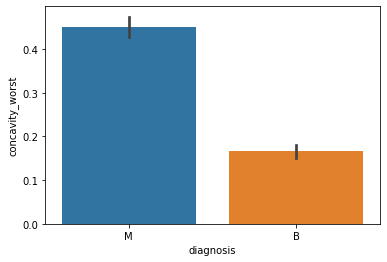

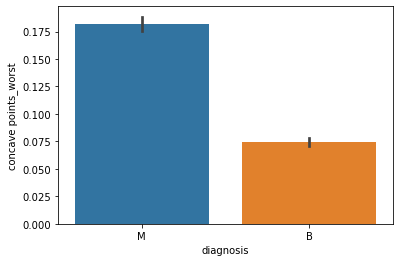

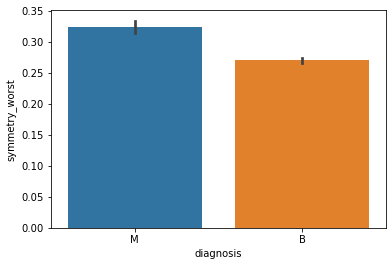

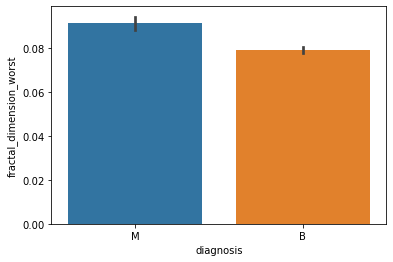

In [12]:
df = data.iloc[:,2:32]
for i in df:
    sns.barplot(data = df, y = df[i], x = data["diagnosis"])
    plt.show()

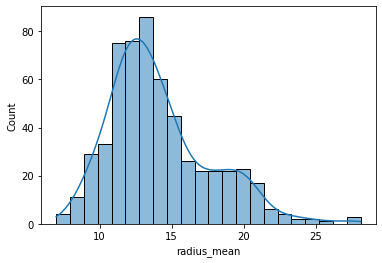

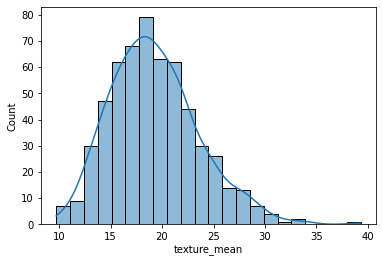

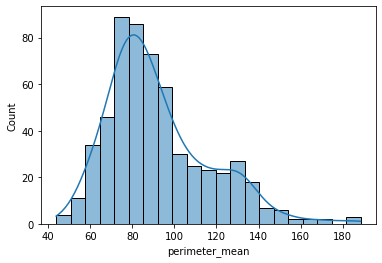

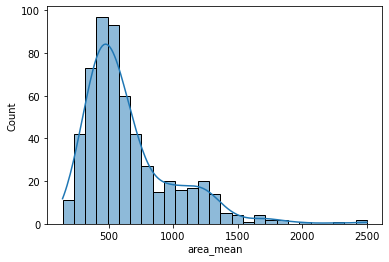

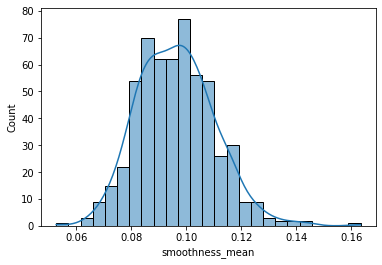

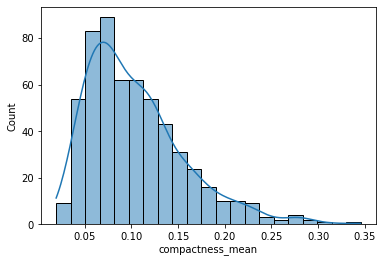

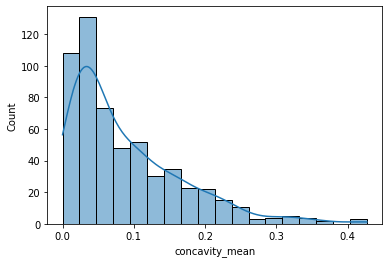

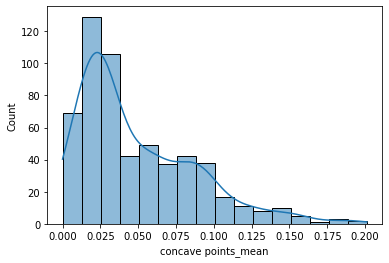

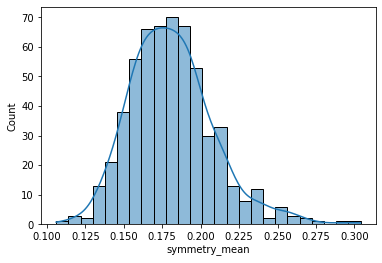

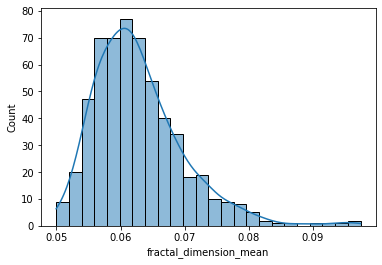

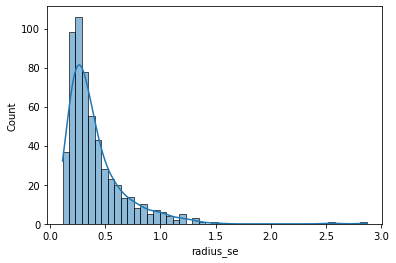

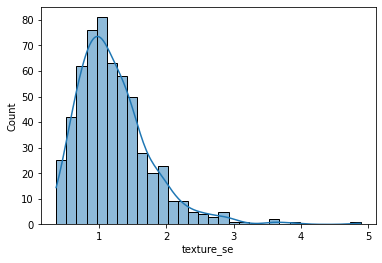

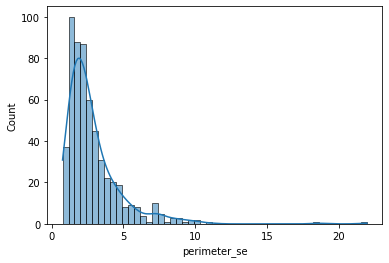

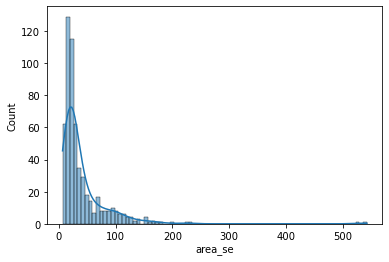

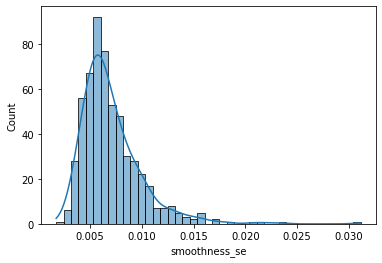

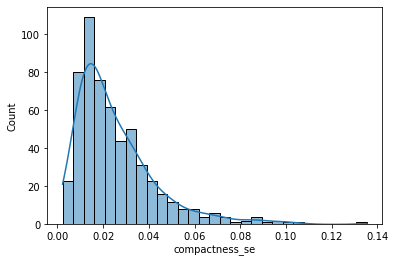

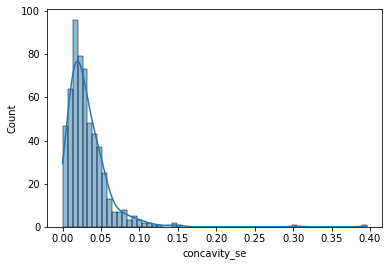

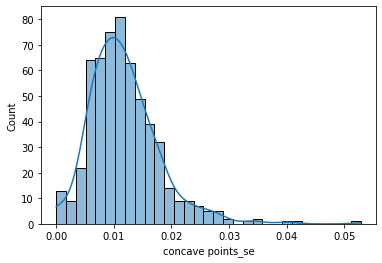

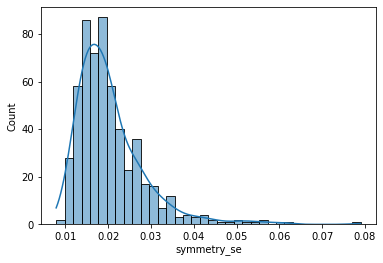

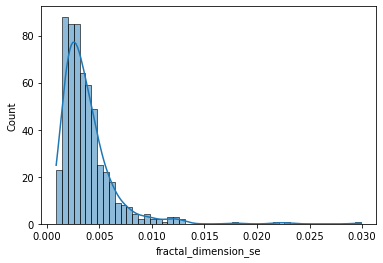

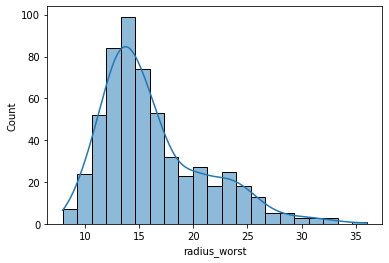

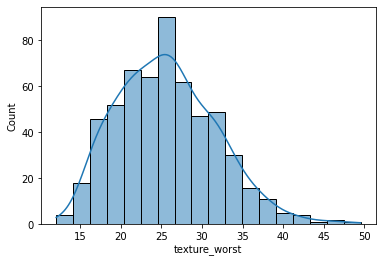

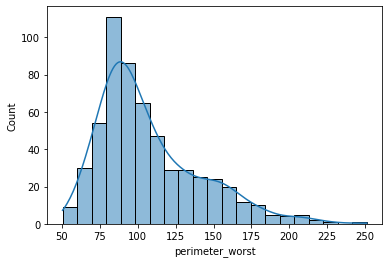

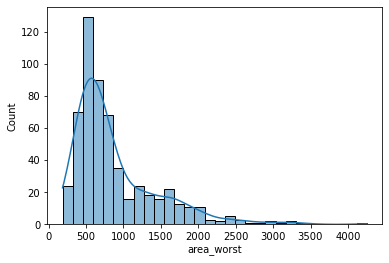

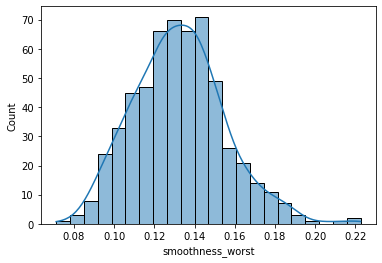

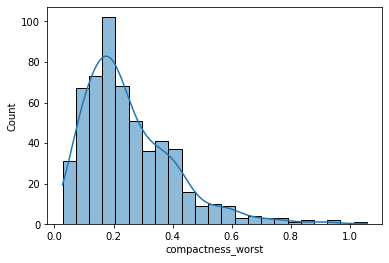

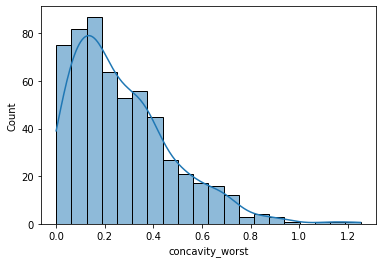

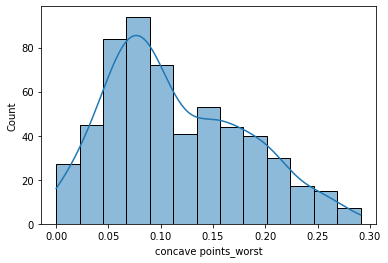

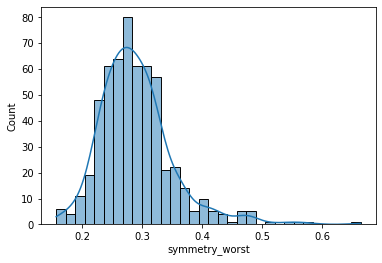

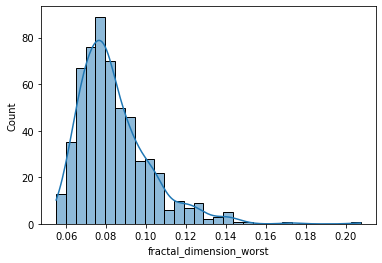

In [13]:
df = data.iloc[:,2:32]
for i in df:
    sns.histplot(data = df, x = df[i], kde=True)
    plt.show()

df = data.iloc[:,2:32]
for i in df:
    sns.catplot(data = df, y = data[i], x = data["diagnosis"], hue = data["diagnosis"])
    plt.show()

In [14]:
#sns.pairplot(data.iloc[: ,1:],corner = True, hue = 'diagnosis')

enc = OneHotEncoder(sparse=False,drop="if_binary").fit(data[["diagnosis"]])
encoded = enc.transform(data[["diagnosis"]])
encoded_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out())
data_one_hot = pd.concat([data,encoded_df],axis=1)
data_one_hot = data_one_hot.drop(["diagnosis", "id"],axis=1)

data_one_hot

<AxesSubplot:>

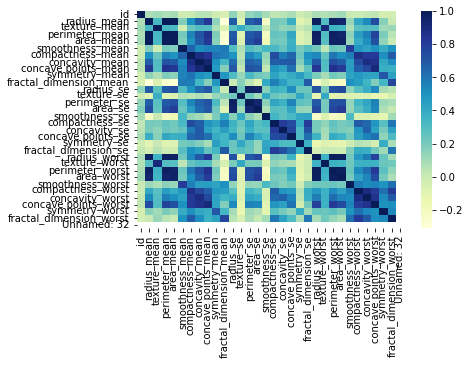

In [15]:
corr = data.corr() # Pearson Correlation

# Heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

In [16]:
# Unstack correlation matrix 
corr_df = corr.unstack().reset_index() 
corr_df

# rename columns
corr_df.columns = ['feature_1','feature_2', 'correlation'] 

# sort by correlation
corr_df.sort_values(by="correlation",ascending=False, inplace=True) 

# Remove self correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] 
corr_df

,feature_1,feature_2,correlation
35,radius_mean,perimeter_mean,0.997855
97,perimeter_mean,radius_mean,0.997855
695,radius_worst,perimeter_worst,0.993708
757,perimeter_worst,radius_worst,0.993708
129,area_mean,radius_mean,0.987357
...,...,...,...
1018,Unnamed: 32,compactness_worst,NaN
1019,Unnamed: 32,concavity_worst,NaN
1020,Unnamed: 32,concave points_worst,NaN
1021,Unnamed: 32,symmetry_worst,NaN


In [17]:
# on regarde les features qui sont corréelées entre elles à plus où moins 0.90 
correlated_features = len(corr_df[(corr_df['correlation'] >= 0.9) | (corr_df['correlation'] <= -0.9)])

correlated_features

42

In [18]:
# on regarde celles qui sont corréellées avec la target
data_corr_df = corr_df[corr_df['feature_1'] == 'diagnosis']
data_corr_df

,feature_1,feature_2,correlation


In [19]:
# on crée un model de base: le baseline

In [20]:
# define X, y
y = data["diagnosis"]
X = data.drop(["diagnosis"], axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)                                                   

In [22]:
dummy_clf = DummyClassifier(strategy="most_frequent")

# fit the modem
dummy_clf.fit(X_train, y_train)

# calculate the score
dummy_clf.score(X_test, y_test)

0.631578947368421

In [23]:
# pour écarter le risque chance, on fait une cross value

In [24]:
# on cherche le meilleur paramètre pour random sate
def best_random():
    for random_state in range(0,42):
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state = random_state)
        dummy_clf.fit(X_train, y_train)
        #return dummy_clf.score(X_test, y_test)
    print(f'{random_state}' 'score is :' f'{dummy_clf.score}')

In [25]:
best_random()

41score is :<bound method DummyClassifier.score of DummyClassifier(strategy='most_frequent')>


In [26]:
# Instanciate model
dummy_clf = DummyClassifier(strategy="most_frequent")

# 5-Fold Cross validate model
# on applique le meilleur résultat otenu a cv soit 41
cv_results = cross_validate(dummy_clf, X_test, y_test, cv=41)

# obtain the mean of scores
cv_results['test_score'].mean()

0.6329268292682928

In [27]:
# on applique une cross validation sur le model

In [28]:
# on recherche la meilleure valeur de cross validation

Best accuracy is: 0.6288135593220336 for cv:59


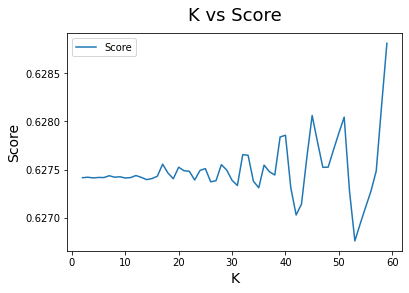

In [29]:
K = []
total_time = []
score = []

for k in range(2,60):
    cross_val_results = cross_validate(dummy_clf, X, y, cv=k)
    total_time.append(sum(cross_val_results['fit_time'])+sum(cross_val_results['score_time']))
    K.append(k)
    score.append(cross_val_results['test_score'].mean())
        
plt.plot(K, score, label = 'Score')
plt.ylabel('Score', fontsize = 14)
plt.xlabel('K', fontsize = 14)
plt.title('K vs Score', fontsize = 18, y = 1.03)
print('Best accuracy is:' + ' ' f'{max(score)}' + ' ' + 'for cv:' f'{2+score.index(max(score))}')
plt.legend()

In [30]:
# Le baseline est terminé, il est à noté qu'il est fait sur un baseline semplifié 

In [31]:
# on importe un csv

In [33]:
data_baseline = data.copy()

In [37]:
data_baseline.to_csv('data_baseline.csv')

In [38]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
baseline = dummy_clf

In [39]:
# Export as pickle file
with open("baseline.pkl", "wb") as file:
    pickle.dump(dummy_clf, file)

# Load pipeline from pickle file
my_pipeline = pickle.load(open("baseline.pkl","rb"))

my_pipeline.score(X_test, y_test)

0.631578947368421

In [52]:
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=41)
pipe = Pipeline([('scaler', RobustScaler()), ('dummy', DummyClassifier(strategy="most_frequent"))])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)
Pipeline(steps=[('scaler', RobustScaler()), ('dummy', DummyClassifier(strategy="most_frequent"))])
#pipe.score(X_test, y_test)
#pipe[:-1].get_feature_names_out()

Pipeline(steps=[('scaler', RobustScaler()),
                ('dummy', DummyClassifier(strategy='most_frequent'))])